### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Definisikan path kaggle json
# Sesuaikan dengan path anda
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Tugas-Augmentation-ML-FinalTry"

In [ ]:
#Create Folder
!mkdir '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Tugas-Augmentation-ML-FinalTry'

In [ ]:
# Ubah lokasi direktori kerja
# Sesuaikan dengan path anda
%cd /content/drive/MyDrive/Colab Notebooks/Machine Learning/Tugas-Augmentation-ML-FinalTry

/content/drive/MyDrive/Colab Notebooks/Machine Learning/Tugas-Augmentation-ML-FinalTry


In [ ]:
# Cek apakah api sudah terbaca oleh sistem
!ls  

In [ ]:
#Copy kaggle.json, dan di paste ke folder baru
!cp '/content/drive/MyDrive/Colab Notebooks/Machine Learning/kaggle.json' '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Tugas-Augmentation-ML-FinalTry'

In [ ]:
#Download Dataset
!kaggle datasets download -d waifuai/cat2dog

 77% 21.0M/27.4M [00:00<00:00, 21.5MB/s]
100% 27.4M/27.4M [00:00<00:00, 37.5MB/s]


In [ ]:
#Unzip Dataset and Remove file .zip dari folder
!unzip \*.zip &> /dev/null && rm *.zip

### Create Folder Dataset, 
###Create Folder Dataset_split, 
###Move file trainA & trainB ke file dataset

In [ ]:
!mkdir 'cat2dog/dataset'

In [ ]:
!mkdir 'cat2dog/dataset_split'

In [ ]:
!mv 'cat2dog/trainA' 'cat2dog/dataset/'

In [ ]:
!mv 'cat2dog/trainB' 'cat2dog/dataset/'

###Move isi file trainA ke file baru bernama Cat
###Move isi file trainB ke file baru bernama Dog
###Create  folder test yang nanti akan menampung file testA dan B dari Cat dan Dog

In [ ]:
!mv 'cat2dog/dataset/trainA' 'cat2dog/dataset/cat'

In [ ]:
!mv 'cat2dog/dataset/trainB' 'cat2dog/dataset/dog'

In [ ]:
!mkdir 'cat2dog/test'
!mv 'cat2dog/testA' 'cat2dog/cat'
!mv 'cat2dog/testB' 'cat2dog/dog'

!mv 'cat2dog/cat' 'cat2dog/test'
!mv 'cat2dog/dog' 'cat2dog/test'

### Preprocessing

In [ ]:
#install split folder
pip install split-folders

In [ ]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("cat2dog/dataset", output="cat2dog/dataset_split", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

Copying files: 2035 files [00:27, 73.71 files/s]


In [ ]:
#pindah file test ke folder dataset_split agar 1 folder dengan file train dan val
!mv 'cat2dog/test' 'cat2dog/dataset_split'

In [ ]:
#inisialisasi path
import os
base_dir = 'cat2dog'

train_dir = os.path.join(base_dir, 'dataset_split/train')
validation_dir = os.path.join(base_dir, 'dataset_split/val')
test_dir = os.path.join(base_dir, 'dataset_split/test')

train_cat_dir = os.path.join(train_dir, 'cat')
train_dog_dir = os.path.join(train_dir, 'dog')

validation_cat_dir = os.path.join(validation_dir, 'cat')
validation_dog_dir = os.path.join(validation_dir, 'dog')

test_cat_dir = os.path.join(test_dir, 'cat')
test_dog_dir = os.path.join(test_dir, 'dog')

In [ ]:
#Menjumlah isi image dari file train
train_len_func = lambda x: int(80/100*len(x))
print(train_len_func(os.listdir(train_cat_dir)))
print(train_len_func(os.listdir(train_dog_dir)))

492
808


In [ ]:
#Menampilkan isi dari masing masing traing, validation, test
print(os.listdir(train_cat_dir))
print(os.listdir(train_dog_dir))
print(os.listdir(validation_cat_dir))
print(os.listdir(validation_dog_dir))
print(os.listdir(test_cat_dir))
print(os.listdir(test_dog_dir))

['329.jpg', '7.jpg', '439.jpg', '50.jpg', '572.jpg', '69.jpg', '93.jpg', '619.jpg', '449.jpg', '62.jpg', '810.jpg', '437.jpg', '842.jpg', '160.jpg', '631.jpg', '375.jpg', '673.jpg', '480.jpg', '133.jpg', '524.jpg', '65.jpg', '759.jpg', '596.jpg', '19.jpg', '552.jpg', '611.jpg', '150.jpg', '868.jpg', '226.jpg', '722.jpg', '684.jpg', '402.jpg', '613.jpg', '63.jpg', '353.jpg', '487.jpg', '750.jpg', '191.jpg', '392.jpg', '680.jpg', '555.jpg', '120.jpg', '551.jpg', '57.jpg', '70.jpg', '500.jpg', '545.jpg', '271.jpg', '2.jpg', '710.jpg', '843.jpg', '102.jpg', '376.jpg', '99.jpg', '184.jpg', '326.jpg', '149.jpg', '40.jpg', '809.jpg', '185.jpg', '274.jpg', '575.jpg', '503.jpg', '340.jpg', '47.jpg', '563.jpg', '765.jpg', '131.jpg', '709.jpg', '240.jpg', '495.jpg', '193.jpg', '279.jpg', '659.jpg', '712.jpg', '701.jpg', '86.jpg', '717.jpg', '368.jpg', '591.jpg', '475.jpg', '48.jpg', '255.jpg', '436.jpg', '749.jpg', '793.jpg', '582.jpg', '263.jpg', '4.jpg', '735.jpg', '462.jpg', '463.jpg', '687.jp

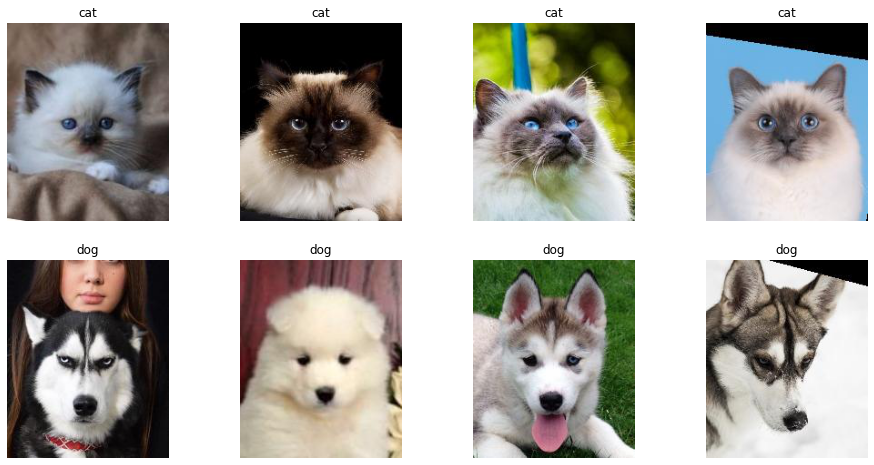

In [ ]:
#Menampilkan Foto dan memberi label dari kelas Cat dan Dog
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 2
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cat_dir, fname) 
                for fname in os.listdir(train_cat_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dog_dir, fname) 
                for fname in os.listdir(train_dog_dir)[pic_index-8:pic_index]]
                
for i, img_path in enumerate(next_cat_pix[0:4]+next_dog_pix[0:4]):
  # Set up subplot; subplot indices start at 1
  if i == nrows * ncols:
    break
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.set_title(os.path.basename(os.path.dirname(img_path)))
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
test_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
    )

In [ ]:
training_generator = training_data_generator.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size= 32,
    class_mode="categorical",
    color_mode="rgb")
validation_generator = validation_data_generator.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size= 32,
    class_mode="categorical",
    color_mode="rgb")
test_generator = test_data_generator.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size= 4,
    class_mode="categorical", 
    color_mode="rgb",
    shuffle=False)

Found 1627 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### Model & Training

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Flatten,  Dropout

In [ ]:
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3])) # layer input
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
# Tampilkan model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 67500)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               8640128   
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                1040      
                                                                 
 dense_7 (Dense)             (None, 2)                 34        
                                                                 
Total params: 8,649,458
Trainable params: 8,649,458
No

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['acc'])

In [ ]:
H = model.fit(training_generator, batch_size=32, epochs=100, validation_data=validation_generator)

Epoch 1/100
51/51 [==============================] - 19s 356ms/step - loss: 3.9216 - acc: 0.7400 - val_loss: 0.2855 - val_acc: 0.9583
Epoch 2/100
51/51 [==============================] - 18s 345ms/step - loss: 0.5684 - acc: 0.9023 - val_loss: 0.1188 - val_acc: 0.9706
Epoch 3/100
51/51 [==============================] - 18s 352ms/step - loss: 0.2643 - acc: 0.9416 - val_loss: 0.1780 - val_acc: 0.9559
Epoch 4/100
51/51 [==============================] - 18s 356ms/step - loss: 0.2998 - acc: 0.9385 - val_loss: 0.3287 - val_acc: 0.9069
Epoch 5/100
51/51 [==============================] - 18s 355ms/step - loss: 0.1885 - acc: 0.9527 - val_loss: 0.1278 - val_acc: 0.9706
Epoch 6/100
51/51 [==============================] - 18s 351ms/step - loss: 0.3167 - acc: 0.9367 - val_loss: 0.1042 - val_acc: 0.9730
Epoch 7/100
51/51 [==============================] - 19s 372ms/step - loss: 0.2862 - acc: 0.9293 - val_loss: 0.0647 - val_acc: 0.9804
Epoch 8/100
51/51 [==============================] - 18s 353ms

###Result

Create Plot Loss dan Accuracy

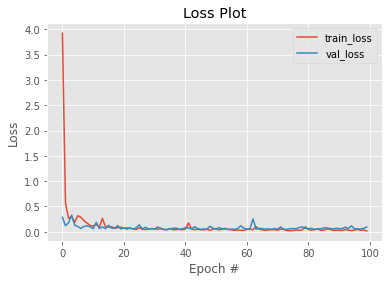

In [ ]:
import numpy as np
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

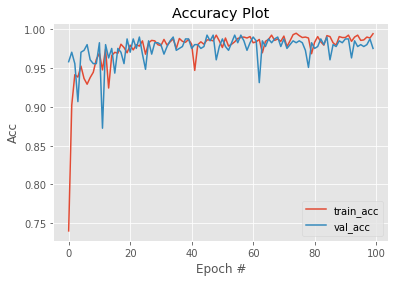

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

Create calssification report untuk melihat hasil Accuracy training

In [ ]:
from sklearn.metrics import classification_report

testLab = test_generator.classes
pred = model.predict(test_generator)
y_pred = np.argmax(pred, axis=-1)

print(classification_report(y_pred, testLab))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       100
           1       0.99      0.99      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



###Testing

In [ ]:
labels = ['cat', 'dog']

In [ ]:
import glob, random
image_rand = []

In [ ]:
input_size = (150,150)
channel = (3,)
input_shape = input_size + channel

In [ ]:
for x in image_rand:
  imgg = Image.open(x)
  X = preprocess(imgg,input_size)
  X = reshape([X])
  y = model.predict(X)
  plt.imshow(imgg)
  print( labels[np.argmax(y)], np.max(y) )

In [ ]:
from PIL import Image

In [ ]:
def predicts(x):
  imgg = Image.open(x)
  X = preprocess(imgg,input_size)
  X = reshape([X])
  y = model.predict(X)
  return ",predicted as " +  labels[np.argmax(y)] + ". with acc :"+ str(np.max(y)) 

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr
def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

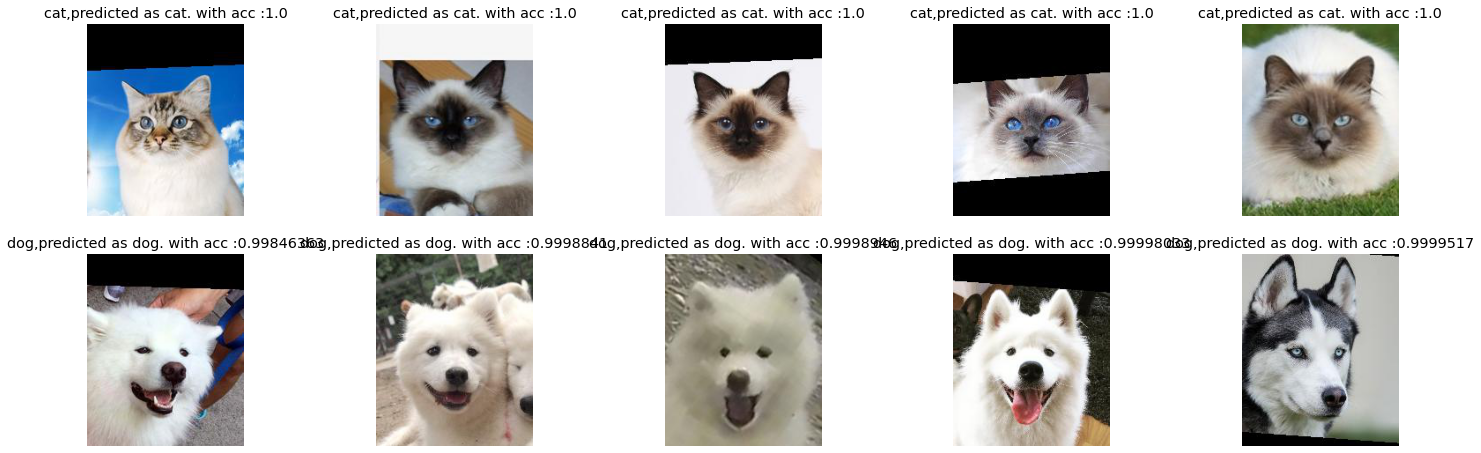

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 5

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 4)

pic_index += 8
test_cat_pix = [os.path.join(test_cat_dir, fname) 
                for fname in os.listdir(test_cat_dir)[pic_index-8:pic_index]]
test_dog_pix = [os.path.join(test_dog_dir, fname) 
                for fname in os.listdir(test_dog_dir)[pic_index-8:pic_index]]
                
for i, img_path in enumerate(test_cat_pix[0:5]+test_dog_pix[0:5]):
  # Set up subplot; subplot indices start at 1
  if i == nrows * ncols:
    break
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.set_title(os.path.basename(os.path.dirname(img_path)) + predicts(img_path))
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)